In [2]:
#Import Library
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sn



Ini adalah bagian data set Custumers Dataset

In [3]:
#masukkan dataset
customers_df=pd.read_csv("customers_dataset.csv")
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#Mencek dataset
customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
#Mencek apakah ada data yang tidak valid
customers_df.isna().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
#EDA Customer
customer_by_state = customers_df.groupby('customer_city')['customer_unique_id'].nunique()
top_states = customer_by_state.sort_values(ascending=False)[:10]
print(top_states)
#dapat disimpulkan customer dengan id unik atau jumlah 10 peringkat  customer terbanyak sebagai berikut

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64


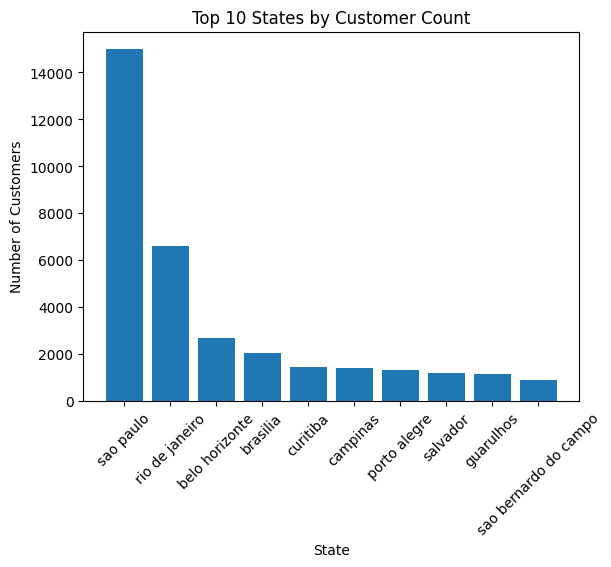

In [9]:
plt.bar(top_states.index, top_states.values)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 10 States by Customer Count')
plt.show()

Ini adalah bagian data set geolocation

In [10]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
#Mencek dataset
geolocation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
#Mencek apakah ada data yang tidak valid
geolocation_df.isna().sum()


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [13]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [14]:
#Menghilangkan duplicate data
geolocation_df.drop_duplicates(inplace=True)

In [15]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


Ini adalah bagian data set order Item

In [17]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
#Mencek dataset
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
#Mengubah data tipe date yang shipping_limit_date dari object menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


In [20]:
#Mencek ulang dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


YEY

In [21]:
#cek apakah ada data yang tidak valid
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
#cek bagian dataset
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [24]:
missing_values3 = order_items_df[order_items_df['freight_value'] == 0]
print(missing_values3)

                                order_id  order_item_id  \
114     00404fa7a687c8c44ca69d42695aae73              1   
258     00a870c6c06346e85335524935c600c0              1   
483     011c899816ea29773525bd3322dbb6aa              1   
508     012b3f6ab7776a8ab3443a4ad7bef2e6              1   
509     012b3f6ab7776a8ab3443a4ad7bef2e6              2   
...                                  ...            ...   
111094  fc698f330ec7fb74859071cc6cb29772              1   
111497  fd4907109f6bac23f07064af84bec02d              1   
111649  fd95e4b85ebbb81853d4a6be3d61432b              1   
112182  fee19a0dc7358b6962a611cecf6a37b4              1   
112607  ffe73fc1d73e03fdb50e63903ddfe882              1   

                              product_id                         seller_id  \
114     53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
258     aca2eb7d00ea1a7b8ebd4e68314663af  955fee9216a65b617aa5c0531780ce60   
483     53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358

In [25]:
order_items_df.drop(order_items_df[order_items_df['freight_value'] == 0].index, inplace=True)

In [26]:
#cek bagian dataset
order_items_df.describe()

,order_item_id,price,freight_value
count,112267.000000,112267.000000,112267.000000
mean,1.198010,120.728970,20.058517
std,0.705803,183.919245,15.790087
min,1.000000,0.850000,0.010000
25%,1.000000,39.900000,13.100000
50%,1.000000,74.900000,16.290000
75%,1.000000,134.990000,21.170000
max,21.000000,6735.000000,409.680000


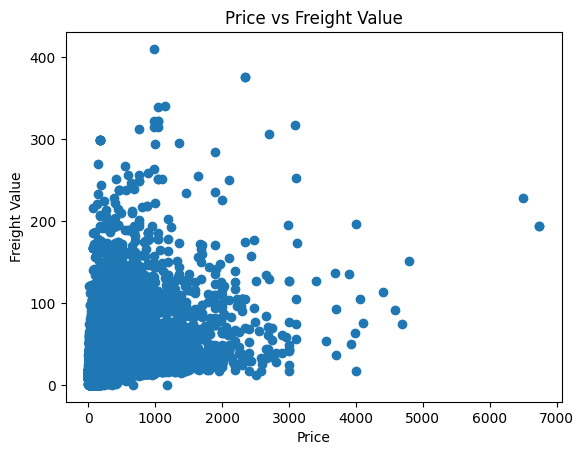

In [27]:
#Visualisasi korelasi antara harga dengan biaya kargo
plt.scatter(order_items_df["price"], order_items_df["freight_value"])
plt.title("Price vs Freight Value")
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.show()

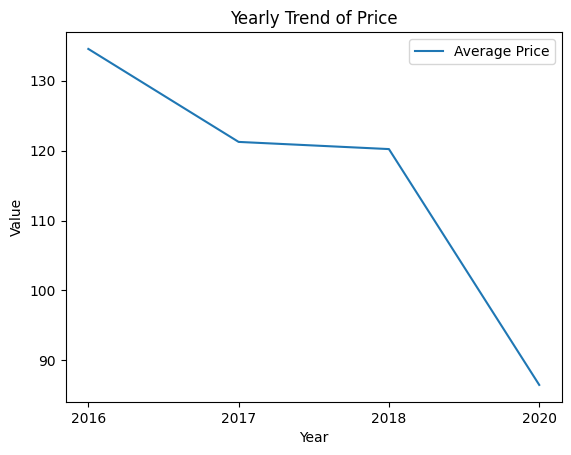

In [28]:
order_items_df['month_year'] = order_items_df['shipping_limit_date'].dt.to_period('Y')
monthly_data = order_items_df.groupby('month_year').agg({'price' : 'mean'})
monthly_data.index = monthly_data.index.strftime('%Y')

plt.plot(monthly_data.index, monthly_data['price'], label='Average Price')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Trend of Price')
plt.legend()
plt.show()

C:\Users\situn\AppData\Local\Temp\ipykernel_5176\2850843766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(order_items_df.corr(), annot=True, cmap="coolwarm")


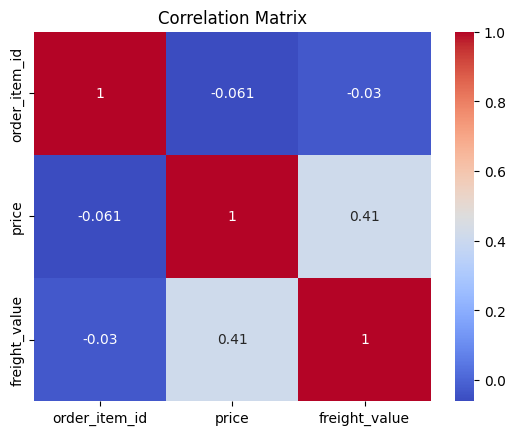

In [29]:
import seaborn as sns
sns.heatmap(order_items_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Ini Bagian Dataset Order Payments

In [30]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
#Mencek dataset
order_payments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [32]:
#cek apakah ada data yang tidak valid
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [33]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
#cek bagian dataset
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [35]:
#Mencari missing value pada payment installment dimana nilai = 0 tidak valid dan dilakukan pencarian data tersebut
missing_values = order_payments_df[order_payments_df['payment_installments'] == 0]
print(missing_values)

                               order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94  


In [36]:
#menghapus missing value pada payment installments
order_payments_df.drop(order_payments_df[order_payments_df['payment_installments'] == 0].index, inplace=True)

In [37]:
#cek missing value lagi
order_payments_df.describe()
##Ternyata pada payment value masih ada 0 lanjut lagi

,payment_sequential,payment_installments,payment_value
count,103884.000000,103884.000000,103884.000000
mean,1.092661,2.853404,154.101531
std,0.706579,2.687047,217.495943
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


In [38]:
missing_values = order_payments_df[order_payments_df['payment_value'] == 0]
print(missing_values)

                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  

In [39]:
#menghapus missing value pada payment Value yang bernilai 0
order_payments_df.drop(order_payments_df[order_payments_df['payment_value'] == 0].index, inplace=True)

In [40]:
#cek missing value lagi
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103875.000000,103875.000000,103875.000000
mean,1.092323,2.853564,154.114883
std,0.704308,2.687108,217.500635
min,1.000000,1.000000,0.010000
25%,1.000000,1.000000,56.815000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


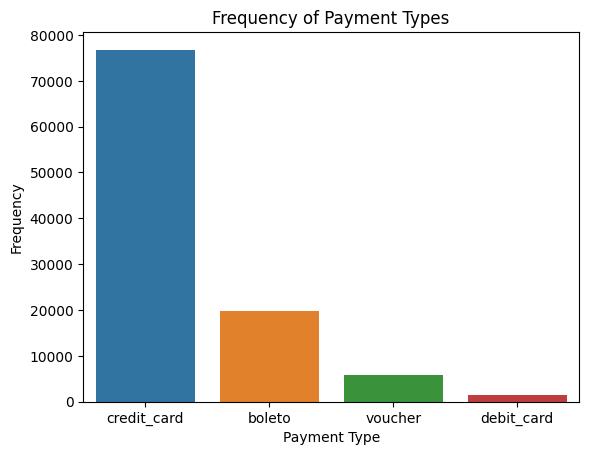

In [41]:
payment_counts = order_payments_df['payment_type'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Types')
plt.show()

Ini adalah bagian Order Review

In [42]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [43]:
#Mencek dataset
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [44]:
#Mengubah data tipe date yang review_creation_date & review_answer_timestamp dari object menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [45]:
#cek kembali dataset
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [46]:
#cek apakah ada data yang tidak valid
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [47]:
#menghapus komen title dan massage dengan nilai tidak valid
order_reviews_df.dropna(inplace=True)


In [48]:
#Cek kembali
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [49]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
#cek bagian dataset
order_reviews_df.describe()

,review_score
count,9839.000000
mean,3.837585
std,1.556435
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


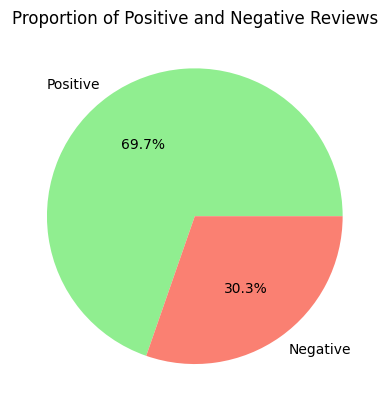

In [51]:
score_counts = order_reviews_df['review_score'].value_counts()
labels = ['Positive', 'Negative']
sizes = [score_counts[4] + score_counts[5], score_counts[1] + score_counts[2] + score_counts[3]]
colors = ['lightgreen', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Positive and Negative Reviews')
plt.show()

Ini Adalah Bagian Order Dataset

In [52]:
order_dataset_df = pd.read_csv("orders_dataset.csv")
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [53]:
#Mencek dataset
order_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [54]:
#Mengubah data tipe object menjadi datetime
order_dataset_df['order_purchase_timestamp'] = pd.to_datetime(order_dataset_df['order_purchase_timestamp'])
order_dataset_df['order_approved_at'] = pd.to_datetime(order_dataset_df['order_approved_at'])
order_dataset_df['order_delivered_carrier_date'] = pd.to_datetime(order_dataset_df['order_delivered_carrier_date'])
order_dataset_df['order_delivered_customer_date'] = pd.to_datetime(order_dataset_df['order_delivered_customer_date'])
order_dataset_df['order_estimated_delivery_date'] = pd.to_datetime(order_dataset_df['order_estimated_delivery_date'])

In [55]:
#cek ulang dataset
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


YEYYYY

In [56]:
#cek apakah ada data yang tidak valid   
order_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [57]:
#hapus nilai null
order_dataset_df.dropna(inplace=True)

In [58]:
#cek kembali 
order_dataset_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Iey!!!

In [59]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", order_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [60]:
#cek bagian dataset
order_dataset_df.describe()

C:\Users\situn\AppData\Local\Temp\ipykernel_5176\3345997672.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_dataset_df.describe()
C:\Users\situn\AppData\Local\Temp\ipykernel_5176\3345997672.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_dataset_df.describe()
C:\Users\situn\AppData\Local\Temp\ipykernel_5176\3345997672.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


Ini adalah bagian product category name translation

In [61]:
product_category_df = pd.read_csv("product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [62]:
#Mencek dataset
product_category_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [63]:
#cek apakah ada data yang tidak valid
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [64]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [65]:
#cek bagian dataset
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Ini adalah bagian Product dataset

In [66]:
product_dataset_df = pd.read_csv("products_dataset.csv")
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [67]:
#Mencek dataset
product_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [68]:
#cek apakah ada data yang tidak valid
product_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [69]:
#menghapus NaN
product_dataset_df.dropna(inplace=True)

In [70]:
#Cek Kembali
product_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [71]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", product_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
#cek bagian dataset
product_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [73]:
#membersihkan nilai 0 pada bagian berat produk
missing_values2 = product_dataset_df[product_dataset_df['product_weight_g'] == 0]
print(missing_values2)

                             product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
9769                0.0               30.0               25.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
32079               0.0

In [74]:
#Membersihkan
product_dataset_df.drop(product_dataset_df[product_dataset_df['product_weight_g'] == 0].index, inplace=True)

In [75]:
#Cek Kembali
product_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000
mean,48.476249,771.522483,2.189108,2277.238248,30.854651,16.957818,23.207756
std,10.246261,635.158352,1.736844,4279.481580,16.957011,13.636665,12.079273
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


IYESH!

Ini adalah bagian seller dataset

In [76]:
sellers_dataset_df = pd.read_csv("sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [77]:
#Mencek datase
sellers_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [78]:
#cek apakah ada data yang tidak valid
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [79]:
#Cek apakah ada duplikasi dalam dataset
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [80]:
#cek bagian dataset
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [81]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


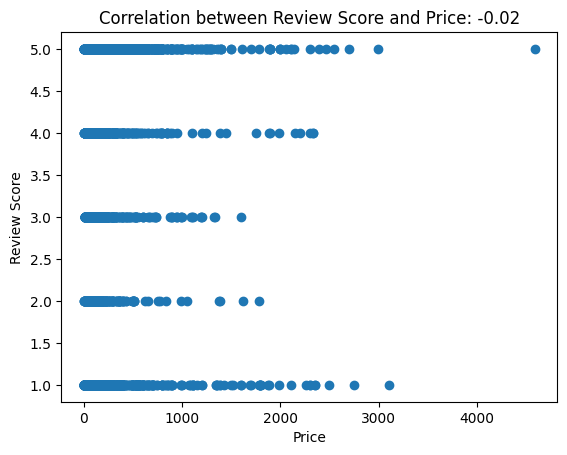

In [82]:
# Merge data
merged_df = pd.merge(order_reviews_df, order_items_df, on='order_id')

# Calculate correlation between review_score and price
corr = merged_df['review_score'].corr(merged_df['price'])

# Create scatter plot
plt.scatter(merged_df['price'], merged_df['review_score'])
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.title(f'Correlation between Review Score and Price: {corr:.2f}')
plt.show()

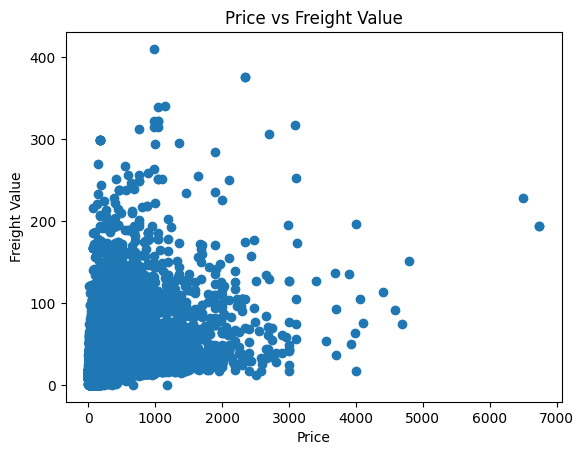

In [83]:
import streamlit as st
plt.scatter(order_items_df["price"], order_items_df["freight_value"])
plt.title("Price vs Freight Value")
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.show()

In [2]:
)

DeltaGenerator()